PH Workbook:

### Data Exploration

Motor Vehicle Deaths vs Independent Variables

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid') 

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [2]:
pd.set_option('display.max_columns', None)  

In [3]:
df = pd.read_csv('df.csv')
df.head()
df = df.dropna(axis=1,how='all')

In [4]:
subs = [(' ', '_'),('.',''),("'",""),('™', ''), ('®',''),
        ('+','plus'), ('½','half'), ('-','_'), ('<','under'), ('%','percent'), ('/', '_or_') 
       ]
def col_formatting(col):
    for old, new in subs:
        col = col.replace(old,new)
    return col

df.columns = [col_formatting(col) for col in df.columns]

In [5]:
del df['Years_of_Potential_Life_Lost_Rate']
df['percent_Rural'] = df['percent_Rural'].replace(np.nan, 0)

### VIsual Exploration

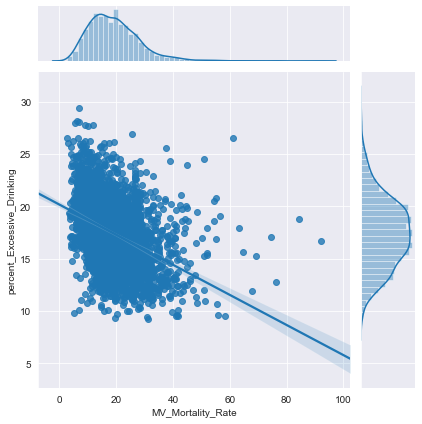

In [6]:
target = 'MV_Mortality_Rate'
sns.jointplot(target,'percent_Excessive_Drinking', data=df, kind='reg');

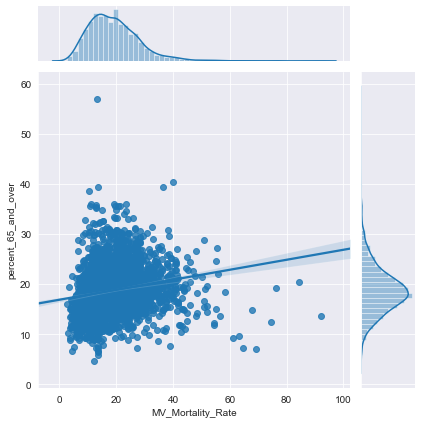

In [7]:
sns.jointplot(target,'percent_65_and_over', data=df, kind='reg');

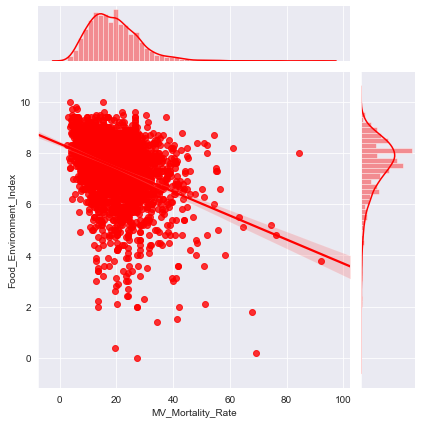

In [8]:
sns.jointplot(target,'Food_Environment_Index', data=df, kind='reg', color='red');

### Checking for Multicollinearity

In [9]:
features = ['percent_Physically_Inactive',
         'percent_Excessive_Drinking',
         'percent_Alcohol_Impaired',
         'percent_Uninsured_x',
         'Average_Daily_PM25',
         'percent_Drive_Alone',
         'percent_Long_Commute___Drives_Alone',
         'percent_Frequent_Physical_Distress',
         'percent_Frequent_Mental_Distress',
         'percent_Insufficient_Sleep',
         'Household_Income',
         'Population_y',
         'percent_under_18',
         'percent_65_and_over',
         'percent_African_American',
         'percent_American_Indian_or_Alaskan_Native',
         'percent_Asian',
         'percent_Native_Hawaiian_or_Other_Pacific_Islander',
         'percent_Hispanic',
         'percent_Non_Hispanic_White',
         'percent_Not_Proficient_in_English',
         'percent_Female',
         'percent_Rural'
        ]

features_short = ['percent_Physically_Inactive',
         'percent_Excessive_Drinking',
         'percent_Alcohol_Impaired',
         'percent_Uninsured_x']

corr = df[features].corr()
corr

,percent_Physically_Inactive,percent_Excessive_Drinking,percent_Alcohol_Impaired,percent_Uninsured_x,Average_Daily_PM25,percent_Drive_Alone,percent_Long_Commute___Drives_Alone,percent_Frequent_Physical_Distress,percent_Frequent_Mental_Distress,percent_Insufficient_Sleep,Household_Income,Population_y,percent_under_18,percent_65_and_over,percent_African_American,percent_American_Indian_or_Alaskan_Native,percent_Asian,percent_Native_Hawaiian_or_Other_Pacific_Islander,percent_Hispanic,percent_Non_Hispanic_White,percent_Not_Proficient_in_English,percent_Female,percent_Rural
percent_Physically_Inactive,1.000000,-0.562618,-0.079836,0.238215,0.333244,0.314471,0.160794,0.547685,0.546388,0.479812,-0.577904,-0.213562,0.066505,0.118582,0.303530,-0.024387,-0.329574,-0.069433,-0.222706,-0.002632,-0.188890,0.100557,0.337525
percent_Excessive_Drinking,-0.562618,1.000000,0.146072,-0.348184,-0.204653,-0.216059,-0.150775,-0.655196,-0.659433,-0.455225,0.539503,0.116615,-0.057803,-0.162691,-0.363502,-0.006236,0.179619,0.013160,-0.005061,0.235220,0.007565,-0.189344,-0.237913
percent_Alcohol_Impaired,-0.079836,0.146072,1.000000,-0.078359,-0.181410,-0.120716,-0.035783,-0.054624,-0.054923,-0.088017,0.029019,-0.020938,-0.048225,0.071929,-0.048775,0.141282,0.012500,0.025101,-0.092469,0.036284,-0.083524,-0.050500,0.077000
percent_Uninsured_x,0.238215,-0.348184,-0.078359,1.000000,-0.166998,-0.124511,-0.071670,0.336521,0.263071,0.063010,-0.360481,-0.071082,0.237631,-0.038399,0.180562,0.252247,-0.102214,-0.021692,0.438906,-0.501915,0.393207,-0.101166,0.167953
Average_Daily_PM25,0.333244,-0.204653,-0.181410,-0.166998,1.000000,0.529734,0.365664,0.240263,0.278872,0.483532,-0.057079,0.158192,0.034642,-0.206558,0.298081,-0.329274,-0.034926,-0.148774,-0.127083,0.021431,-0.049819,0.266789,-0.202904
percent_Drive_Alone,0.314471,-0.216059,-0.120716,-0.124511,0.529734,1.000000,0.172043,0.134902,0.159106,0.279309,-0.125857,-0.116112,0.062504,-0.037726,0.176601,-0.329492,-0.273643,-0.145307,-0.112422,0.131482,-0.185354,0.192522,-0.064984
percent_Long_Commute___Drives_Alone,0.160794,-0.150775,-0.035783,-0.071670,0.365664,0.172043,1.000000,0.077444,0.115918,0.306148,0.150340,0.125439,-0.110645,-0.019270,0.177700,-0.176115,0.024650,-0.058058,-0.127102,0.029210,-0.092009,0.081293,0.189173
percent_Frequent_Physical_Distress,0.547685,-0.655196,-0.054624,0.336521,0.240263,0.134902,0.077444,1.000000,0.956021,0.668226,-0.694037,-0.098866,0.084560,-0.077385,0.346866,0.268826,-0.217096,-0.037253,0.075926,-0.365147,0.053532,0.052078,0.133368
percent_Frequent_Mental_Distress,0.546388,-0.659433,-0.054923,0.263071,0.278872,0.159106,0.115918,0.956021,1.000000,0.680780,-0.667454,-0.102432,0.027452,-0.035499,0.342071,0.281886,-0.233587,-0.044417,-0.082833,-0.261064,-0.070837,0.148203,0.139887
percent_Insufficient_Sleep,0.479812,-0.455225,-0.088017,0.063010,0.483532,0.279309,0.306148,0.668226,0.680780,1.000000,-0.315781,0.080251,-0.010503,-0.257487,0.548037,-0.022854,0.028972,0.035838,-0.079545,-0.337539,-0.008598,0.102703,-0.114779


### Heatmap

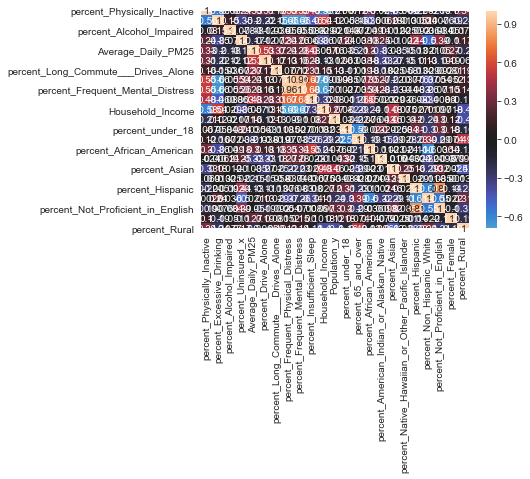

In [10]:
sns.heatmap(corr, center=0, annot=True);

### Modelling the Data

Import the necessary libraries for the modelling phase

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

##### Abitrary Selection of Explanatory Variables

Define the target variable and the independent and explanatory variables

In [20]:
outcome = target
# x_cols = list(df.columns)
# x_cols.remove(outcome)

x_cols = ['percent_Physically_Inactive',
         'percent_Excessive_Drinking',
         'percent_Alcohol_Impaired',
         'percent_Uninsured_x',
         'Average_Daily_PM25',
         'percent_Drive_Alone',
         'percent_Long_Commute___Drives_Alone',
         'percent_Frequent_Physical_Distress',
         'percent_Frequent_Mental_Distress',
         'percent_Insufficient_Sleep',
         'Household_Income',
         'Population_y',
         'percent_under_18',
         'percent_65_and_over',
         'percent_African_American',
         'percent_American_Indian_or_Alaskan_Native',
         'percent_Asian',
         'percent_Native_Hawaiian_or_Other_Pacific_Islander',
         'percent_Hispanic',
         'percent_Non_Hispanic_White',
         'percent_Not_Proficient_in_English',
         'percent_Female',
         'percent_Rural'
        ]

x_cols_short = ['percent_Physically_Inactive',
         'percent_Excessive_Drinking',
         'percent_Alcohol_Impaired',
         'percent_Uninsured_x',
         ]


In [21]:
df['percent_LBW'].fillna(0, inplace = True)
df['Food_Environment_Index'].fillna(df['Food_Environment_Index'].mean(), inplace = True)
df['percent_With_Access'].fillna(0, inplace = True)
df['percent_Alcohol_Impaired'].fillna(0, inplace = True)
df['percent_Uninsured_x'].fillna(0, inplace = True)
df['Chlamydia_Rate'].fillna(0, inplace = True)
df['Teen_Birth_Rate'].fillna(0, inplace = True)

### Test train split

In [22]:
#### Must standardize - Ask where we do it

In [23]:
train, test = train_test_split(df)
train.head(2) 

,FIPS,State,County,YPLL_Rate_(Black),YPLL_Rate_(Hispanic),YPLL_Rate_(White),percent_Fair_or_Poor,Physically_Unhealthy_Days,Mentally_Unhealthy_Days,percent_LBW,percent_LBW_(Black),percent_LBW_(Hispanic),percent_LBW_(White),percent_Smokers,percent_Obese,Food_Environment_Index,percent_Physically_Inactive,percent_With_Access,percent_Excessive_Drinking,percent_Alcohol_Impaired,Chlamydia_Rate,Teen_Birth_Rate,Teen_Birth_Rate_(Black),Teen_Birth_Rate_(Hispanic),Teen_Birth_Rate_(White),percent_Uninsured_x,PCP_Rate,PCP_Ratio,Dentist_Rate,Dentist_Ratio,MHP_Rate,MHP_Ratio,Preventable_Hosp_Rate,Preventable_Hosp_Rate_(Black),Preventable_Hosp_Rate_(Hispanic),Preventable_Hosp_Rate_(White),percent_Screened,percent_Screened_(Black),percent_Screened_(Hispanic),percent_Screened_(White),percent_Vaccinated,percent_Vaccinated_(Black),percent_Vaccinated_(Hispanic),percent_Vaccinated_(White),Cohort_Size,Graduation_Rate,Population_x,percent_Some_College,Labor_Force,percent_Unemployed,percent_Children_in_Poverty,percent_Children_in_Poverty_(Black),percent_Children_in_Poverty_(Hispanic),percent_Children_in_Poverty_(White),80th_Percentile_Income,20th_Percentile_Income,Income_Ratio,percent_Single_Parent_Households,Association_Rate,Annual_Average_Violent_Crimes,Violent_Crime_Rate,Injury_Death_Rate,Average_Daily_PM25,Presence_of_violation,percent_Severe_Housing_Problems,Severe_Housing_Cost_Burden,Overcrowding,Inadequate_Facilities,percent_Drive_Alone,percent_Drive_Alone_(Black),percent_Drive_Alone_(Hispanic),percent_Drive_Alone_(White),percent_Long_Commute___Drives_Alone,Life_Expectancy,Life_Expectancy_(Black),Life_Expectancy_(Hispanic),Life_Expectancy_(White),Age_Adjusted_Mortality,Age_Adjusted_Mortality_(Black),Age_Adjusted_Mortality_(Hispanic),Age_Adjusted_Mortality_(White),Child_Mortality_Rate,Child_Mortality_Rate_(Black),Child_Mortality_Rate_(Hispanic),Child_Mortality_Rate_(White),Infant_Mortality_Rate,Infant_Mortality_Rate_(Black),Infant_Mortality_Rate_(Hispanic),Infant_Mortality_Rate_(White),percent_Frequent_Physical_Distress,percent_Frequent_Mental_Distress,percent_Diabetic,HIV_Prevalence_Rate,percent_Food_Insecure,percent_Limited_Access,Drug_Overdose_Mortality_Rate,MV_Mortality_Rate,percent_Insufficient_Sleep,percent_Uninsured_y,percent_Uninsured1,Other_PCP_Rate,Other_PCP_Ratio,percent_Disconnected_Youth,Household_Income,Household_income_(Black),Household_income_(Hispanic),Household_income_(White),percent_Free_or_Reduced_Lunch,Segregation_index,Segregation_Index,Homicide_Rate,Firearm_Fatalities_Rate,percent_Homeowners,percent_Severe_Housing_Cost_Burden,Population_y,percent_under_18,percent_65_and_over,percent_African_American,percent_American_Indian_or_Alaskan_Native,percent_Asian,percent_Native_Hawaiian_or_Other_Pacific_Islander,percent_Hispanic,percent_Non_Hispanic_White,percent_Not_Proficient_in_English,percent_Female,percent_Rural
1619,30043,Montana,Jefferson,NaN,NaN,NaN,10.652614,3.012596,3.050505,6.623586,NaN,NaN,NaN,14.692034,26.5,8.8,16.3,56.522883,20.042994,28.571429,128.8,13.926499,NaN,NaN,NaN,8.637092,75.93014,1317:1,50.45833,1982:1,67.27777,1486:1,3144.0,NaN,NaN,NaN,39.0,NaN,NaN,NaN,39.0,NaN,NaN,NaN,NaN,80.46,2195,72.072893,5645.0,4.304694,9.5,NaN,31.884058,10.664172,117817,28258,4.169333,27.692308,7.593014,37.0,318.074361,97.504234,7.3,Yes,8.938547,7.858590,0.871508,0.178771,75.546186,NaN,NaN,NaN,22.5,80.081623,NaN,NaN,NaN,276.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.090241,9.617527,8.2,59.4,9.5,2.549469,NaN,17.232678,25.387581,9.842857,5.284068,33.63889,2973:1,NaN,66813.0,NaN,52269.0,64911.0,28.123077,NaN,42.302228,NaN,22.2,85.106383,8.603145,11891,20.326297,20.713144,0.302750,1.774451,0.479354,0.050458,2.329493,93.162896,0.026930,49.390295,100.000000
2709,48373,Texas,Polk,9292.114408,6229.232289,12510.561117,19.017365,3.811287,3.792325,7.637907,13.311688,7.109737,7.099391,17.256215,33.5,6.1,26.9,41.067536,17.477044,17.910448,321.5,54.845457,52.529183,46.190762,59.120404,21.903908,52.17464,1917:1,32.54546,3073:1,34.57955,2892:1,3

In [24]:
print(len(train), len(test))
train.head(2)

2356 786


,FIPS,State,County,YPLL_Rate_(Black),YPLL_Rate_(Hispanic),YPLL_Rate_(White),percent_Fair_or_Poor,Physically_Unhealthy_Days,Mentally_Unhealthy_Days,percent_LBW,percent_LBW_(Black),percent_LBW_(Hispanic),percent_LBW_(White),percent_Smokers,percent_Obese,Food_Environment_Index,percent_Physically_Inactive,percent_With_Access,percent_Excessive_Drinking,percent_Alcohol_Impaired,Chlamydia_Rate,Teen_Birth_Rate,Teen_Birth_Rate_(Black),Teen_Birth_Rate_(Hispanic),Teen_Birth_Rate_(White),percent_Uninsured_x,PCP_Rate,PCP_Ratio,Dentist_Rate,Dentist_Ratio,MHP_Rate,MHP_Ratio,Preventable_Hosp_Rate,Preventable_Hosp_Rate_(Black),Preventable_Hosp_Rate_(Hispanic),Preventable_Hosp_Rate_(White),percent_Screened,percent_Screened_(Black),percent_Screened_(Hispanic),percent_Screened_(White),percent_Vaccinated,percent_Vaccinated_(Black),percent_Vaccinated_(Hispanic),percent_Vaccinated_(White),Cohort_Size,Graduation_Rate,Population_x,percent_Some_College,Labor_Force,percent_Unemployed,percent_Children_in_Poverty,percent_Children_in_Poverty_(Black),percent_Children_in_Poverty_(Hispanic),percent_Children_in_Poverty_(White),80th_Percentile_Income,20th_Percentile_Income,Income_Ratio,percent_Single_Parent_Households,Association_Rate,Annual_Average_Violent_Crimes,Violent_Crime_Rate,Injury_Death_Rate,Average_Daily_PM25,Presence_of_violation,percent_Severe_Housing_Problems,Severe_Housing_Cost_Burden,Overcrowding,Inadequate_Facilities,percent_Drive_Alone,percent_Drive_Alone_(Black),percent_Drive_Alone_(Hispanic),percent_Drive_Alone_(White),percent_Long_Commute___Drives_Alone,Life_Expectancy,Life_Expectancy_(Black),Life_Expectancy_(Hispanic),Life_Expectancy_(White),Age_Adjusted_Mortality,Age_Adjusted_Mortality_(Black),Age_Adjusted_Mortality_(Hispanic),Age_Adjusted_Mortality_(White),Child_Mortality_Rate,Child_Mortality_Rate_(Black),Child_Mortality_Rate_(Hispanic),Child_Mortality_Rate_(White),Infant_Mortality_Rate,Infant_Mortality_Rate_(Black),Infant_Mortality_Rate_(Hispanic),Infant_Mortality_Rate_(White),percent_Frequent_Physical_Distress,percent_Frequent_Mental_Distress,percent_Diabetic,HIV_Prevalence_Rate,percent_Food_Insecure,percent_Limited_Access,Drug_Overdose_Mortality_Rate,MV_Mortality_Rate,percent_Insufficient_Sleep,percent_Uninsured_y,percent_Uninsured1,Other_PCP_Rate,Other_PCP_Ratio,percent_Disconnected_Youth,Household_Income,Household_income_(Black),Household_income_(Hispanic),Household_income_(White),percent_Free_or_Reduced_Lunch,Segregation_index,Segregation_Index,Homicide_Rate,Firearm_Fatalities_Rate,percent_Homeowners,percent_Severe_Housing_Cost_Burden,Population_y,percent_under_18,percent_65_and_over,percent_African_American,percent_American_Indian_or_Alaskan_Native,percent_Asian,percent_Native_Hawaiian_or_Other_Pacific_Islander,percent_Hispanic,percent_Non_Hispanic_White,percent_Not_Proficient_in_English,percent_Female,percent_Rural
1619,30043,Montana,Jefferson,NaN,NaN,NaN,10.652614,3.012596,3.050505,6.623586,NaN,NaN,NaN,14.692034,26.5,8.8,16.3,56.522883,20.042994,28.571429,128.8,13.926499,NaN,NaN,NaN,8.637092,75.93014,1317:1,50.45833,1982:1,67.27777,1486:1,3144.0,NaN,NaN,NaN,39.0,NaN,NaN,NaN,39.0,NaN,NaN,NaN,NaN,80.46,2195,72.072893,5645.0,4.304694,9.5,NaN,31.884058,10.664172,117817,28258,4.169333,27.692308,7.593014,37.0,318.074361,97.504234,7.3,Yes,8.938547,7.858590,0.871508,0.178771,75.546186,NaN,NaN,NaN,22.5,80.081623,NaN,NaN,NaN,276.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.090241,9.617527,8.2,59.4,9.5,2.549469,NaN,17.232678,25.387581,9.842857,5.284068,33.63889,2973:1,NaN,66813.0,NaN,52269.0,64911.0,28.123077,NaN,42.302228,NaN,22.2,85.106383,8.603145,11891,20.326297,20.713144,0.302750,1.774451,0.479354,0.050458,2.329493,93.162896,0.026930,49.390295,100.000000
2709,48373,Texas,Polk,9292.114408,6229.232289,12510.561117,19.017365,3.811287,3.792325,7.637907,13.311688,7.109737,7.099391,17.256215,33.5,6.1,26.9,41.067536,17.477044,17.910448,321.5,54.845457,52.529183,46.190762,59.120404,21.903908,52.17464,1917:1,32.54546,3073:1,34.57955,2892:1,3

In [25]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      MV_Mortality_Rate   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     121.9
Date:                Tue, 25 Feb 2020   Prob (F-statistic):               0.00
Time:                        09:20:32   Log-Likelihood:                -7515.9
No. Observations:                2356   AIC:                         1.508e+04
Df Residuals:                    2332   BIC:                         1.522e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                           -53.8367     13.393     -4.020      0.000     -80.100     -27.573
percent_Physically_Inactive                           0.3933      0.038     10.480      0.000       0.320       0.467
percent_Excessive_Drinking                           -0.1602      0.062     -2.575      0.010      -0.282      -0.038
percent_Alcohol_Impaired                              0.0067      0.008      0.799      0.424      -0.010       0.023
percent_Uninsured_x                                   0.1480      0.036      4.086      0.000       0.077       0.219
Average_Daily_PM25                                   -0.2648      0.087     -3.043      0.002      -0.435      -0.094
percent_Drive_Alone                                   0.0966      0.021      4.499      0.000       0.054       0.139
percent_Long_Commute___Drives_Alone                   0.0516      0.013      3.908      0.000       0.026       0.077
percent_Frequent_Physical_Distress                    0.6917      0.246      2.816      0.005       0.210       1.173
percent_Frequent_Mental_Distress                     -0.4686      0.305     -1.537      0.125      -1.067       0.129
percent_Insufficient_Sleep                           -0.4377      0.056     -7.836      0.000      -0.547      -0.328
Household_Income                                   -7.79e-05   1.84e-05     -4.240      0.000      -0.000   -4.19e-05
Population_y                                      -5.364e-07   4.31e-07     -1.244      0.214   -1.38e-06    3.09e-07
percent_under_18                                      0.3633      0.063      5.762      0.000       0.240       0.487
percent_65_and_over                                   0.0920      0.050      1.840      0.066      -0.006       0.190
percent_African_American                              0.7006      0.125      5.609      0.000       0.456       0.945
percent_American_Indian_or_Alaskan_Native             0.7827      0.131      5.957      0.000       0.525       1.040
percent_Asian                                         0.7238      0.149      4.864      0.000       0.432       1.016
percent_Native_Hawaiian_or_Other_Pacific_Islander     0.9843      0.214      4.608      0.000       0.565       1.403
percent_Hispanic                                      0.6714      0.123      5.454      0.000       0.430       0.913
percent_Non_Hispanic_White                            0.6160      0.126      4.878      0.000       0.368       0.864
percent_Not_Proficient_in_English                    -0.2793      0.079     -3.523      0.000      -0.435      -0.124
percent_Female                                       -0.0972      0.070     -1.382      0.167      -0.235       0.041
percent_Rural  

### Remove the Uninfluential Features

In [26]:
# Your code here - Remove features which do not appear to be statistically relevant
# Extract the p-value table from the summary and use it to subset our features
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

24 18
['percent_Physically_Inactive', 'percent_Excessive_Drinking', 'percent_Uninsured_x', 'Average_Daily_PM25', 'percent_Drive_Alone']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,-53.8367,13.393,-4.020,0.000,-80.100,-27.573
percent_Physically_Inactive,0.3933,0.038,10.480,0.000,0.320,0.467
percent_Excessive_Drinking,-0.1602,0.062,-2.575,0.010,-0.282,-0.038
percent_Alcohol_Impaired,0.0067,0.008,0.799,0.424,-0.010,0.023
percent_Uninsured_x,0.1480,0.036,4.086,0.000,0.077,0.219


In [27]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      MV_Mortality_Rate   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     154.9
Date:                Tue, 25 Feb 2020   Prob (F-statistic):               0.00
Time:                        09:20:39   Log-Likelihood:                -7521.1
No. Observations:                2356   AIC:                         1.508e+04
Df Residuals:                    2337   BIC:                         1.519e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                           -59.6592     12.837     -4.648      0.000     -84.832     -34.487
percent_Physically_Inactive                           0.4160      0.037     11.322      0.000       0.344       0.488
percent_Excessive_Drinking                           -0.1509      0.056     -2.689      0.007      -0.261      -0.041
percent_Uninsured_x                                   0.1413      0.036      3.927      0.000       0.071       0.212
Average_Daily_PM25                                   -0.3268      0.085     -3.856      0.000      -0.493      -0.161
percent_Drive_Alone                                   0.0998      0.021      4.665      0.000       0.058       0.142
percent_Long_Commute___Drives_Alone                   0.0440      0.013      3.416      0.001       0.019       0.069
percent_Frequent_Physical_Distress                    0.3344      0.122      2.742      0.006       0.095       0.573
percent_Insufficient_Sleep                           -0.4619      0.054     -8.548      0.000      -0.568      -0.356
Household_Income                                  -7.684e-05    1.8e-05     -4.266      0.000      -0.000   -4.15e-05
percent_under_18                                      0.2808      0.044      6.448      0.000       0.195       0.366
percent_African_American                              0.7333      0.124      5.891      0.000       0.489       0.977
percent_American_Indian_or_Alaskan_Native             0.8135      0.131      6.212      0.000       0.557       1.070
percent_Asian                                         0.7358      0.148      4.982      0.000       0.446       1.025
percent_Native_Hawaiian_or_Other_Pacific_Islander     1.0317      0.213      4.848      0.000       0.614       1.449
percent_Hispanic                                      0.7198      0.122      5.902      0.000       0.481       0.959
percent_Non_Hispanic_White                            0.6496      0.126      5.160      0.000       0.403       0.897
percent_Not_Proficient_in_English                    -0.2934      0.079     -3.737      0.000      -0.447      -0.139
percent_Rural                                         0.1036      0.006     17.588      0.000       0.092       0.115
==============================================================================
Omnibus:                     1087.477   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14073.098
Skew:                           1.835   Prob(JB):                         0.00
Kurtosis:                      14.397   Cond. No.                     5.58e+06
==============================================================================

Warnings:
[1

### Investigate Multicollinearity

In [28]:
 #x_cols = ['percent_Fair_or_Poor', 'Physically_Unhealthy_Days',  'Mentally_Unhealthy_Days', 'percent_LBW', 'percent_Smokers', 'percent_Obese', 'Food_Environment_Index', 'percent_Physically_Inactive', 'percent_With_Access','percent_Excessive_Drinking', 'percent_Alcohol_Impaired', 'Chlamydia_Rate', 'Teen_Birth_Rate', 'percent_Uninsured_x']

In [29]:
X = df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('percent_Physically_Inactive', 64.16196416093922),
 ('percent_Excessive_Drinking', 66.94442974673102),
 ('percent_Uninsured_x', 12.267966453182389),
 ('Average_Daily_PM25', 39.63623389298265),
 ('percent_Drive_Alone', 188.81312794796912),
 ('percent_Long_Commute___Drives_Alone', 12.490551413865903),
 ('percent_Frequent_Physical_Distress', 147.1763461383445),
 ('percent_Insufficient_Sleep', 221.57650355212493),
 ('Household_Income', 60.03601553450771),
 ('percent_under_18', 66.54875144066422),
 ('percent_African_American', 18.968748057008387),
 ('percent_American_Indian_or_Alaskan_Native', 7.213247045411245),
 ('percent_Asian', 2.854188562996256),
 ('percent_Native_Hawaiian_or_Other_Pacific_Islander', 1.2445028276695116),
 ('percent_Hispanic', 20.929619686438482),
 ('percent_Non_Hispanic_White', 369.66463067221713),
 ('percent_Not_Proficient_in_English', 4.777959861690783),
 ('percent_Rural', 10.422677964801558)]

In [36]:
X.describe()

,percent_Physically_Inactive,percent_Excessive_Drinking,percent_Uninsured_x,Average_Daily_PM25,percent_Drive_Alone,percent_Long_Commute___Drives_Alone,percent_Frequent_Physical_Distress,percent_Insufficient_Sleep,Household_Income,percent_under_18,percent_African_American,percent_American_Indian_or_Alaskan_Native,percent_Asian,percent_Native_Hawaiian_or_Other_Pacific_Islander,percent_Hispanic,percent_Non_Hispanic_White,percent_Not_Proficient_in_English,percent_Rural
count,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000
mean,25.699968,17.411379,11.136499,8.922852,79.524618,30.955379,11.990071,33.042574,51097.243475,22.234860,8.967079,2.330171,1.527239,0.136884,9.477653,76.285818,1.731216,58.610718
std,5.173400,3.242948,4.940751,2.167390,7.671185,12.396757,2.325548,4.156839,13501.063257,3.463964,14.309873,7.733871,2.912660,0.949352,13.754475,20.149728,2.900651,31.453384
min,8.400000,9.265156,2.068201,0.000000,4.584942,0.000000,6.936987,23.028348,22679.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.515152,2.760410,0.000000,0.000000
25%,22.300000,15.083152,7.161386,7.600000,77.213914,21.600000,10.203211,30.021654,42275.500000,20.203116,0.684381,0.371932,0.447121,0.030122,2.299307,64.550805,0.275766,33.379442
50%,25.700000,17.376413,10.395225,9.300000,80.970663,30.500000,11.719145,32.947787,48889.000000,22.214871,2.181373,0.633055,0.705543,0.058801,4.275689,83.719462,0.737036,59.537911
75%,29.200000,19.666507,14.011343,10.400000,83.988059,39.500000,13.531624,36.113124,56700.500000,23.993214,10.175090,1.306277,1.389071,0.113605,9.699480,92.508689,1.864438,87.557367
max,45.100000,29.440119,33.453710,19.700000,97.206704,84.500000,24.618454,46.707783,136191.000000,41.241927,85.329609,92.696903,43.006726,47.727273,96.322959,97.922716,35.305344,100.000000


### Perform Another Round of Feature Selection

In [37]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

0 0


In [38]:
# Your code here - Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

PatsyError: expected a noun, but instead the expression ended
    MV_Mortality_Rate~
                     ^

In [39]:
X.isna().sum()

percent_Physically_Inactive                          0
percent_Excessive_Drinking                           0
percent_Uninsured_x                                  0
Average_Daily_PM25                                   0
percent_Drive_Alone                                  0
percent_Long_Commute___Drives_Alone                  0
percent_Frequent_Physical_Distress                   0
percent_Insufficient_Sleep                           0
Household_Income                                     0
percent_under_18                                     0
percent_African_American                             0
percent_American_Indian_or_Alaskan_Native            0
percent_Asian                                        0
percent_Native_Hawaiian_or_Other_Pacific_Islander    0
percent_Hispanic                                     0
percent_Non_Hispanic_White                           0
percent_Not_Proficient_in_English                    0
percent_Rural                                        0
dtype: int

### Check the Normality Assumption
Check whether the normality assumption holds for your model.

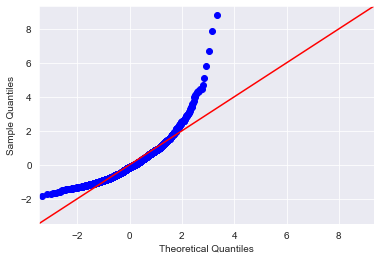

In [40]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

### Check Homoscedasticity Assumption
Check whether the model's errors are indeed homoscedastic or if they violate this principle and display heteroscedasticity.

In [42]:
print(len(train[x_cols]))
print(len(train))
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

2356
2356


PatsyError: predict requires that you use a DataFrame when predicting from a model
that was created using the formula api.

The original error message returned by patsy is:
Error evaluating factor: NameError: name 'percent_Asian' is not defined
    MV_Mortality_Rate~percent_Asian+percent_Native_Hawaiian_or_Other_Pacific_Islander+percent_Not_Proficient_in_English
                      ^^^^^^^^^^^^^

#### This is for the description data

### Make Additional Refinements
Check for outliers

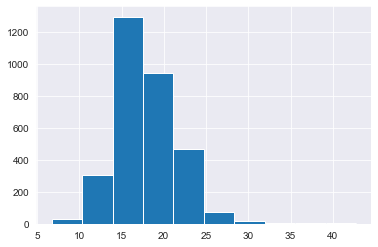

In [43]:
df.percent_Smokers.hist() # using smokers for example

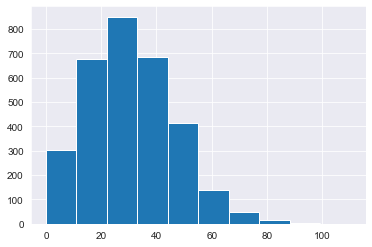

In [44]:
# Teen_Birth_Rate
df.Teen_Birth_Rate.hist()

In [45]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.Teen_Birth_Rate.quantile(q=q)))

0.8 percentile: 44.021632146200005
0.81 percentile: 44.57537042527999
0.82 percentile: 45.13786282708
0.83 percentile: 45.7437253245
0.84 percentile: 46.408010351360005
0.85 percentile: 47.19902860679999
0.86 percentile: 48.28781243336
0.87 percentile: 49.08266710231
0.88 percentile: 49.87582828444
0.89 percentile: 50.517701593030004
0.9 percentile: 51.372594874
0.91 percentile: 52.51232592673
0.92 percentile: 53.86830442256
0.93 percentile: 54.719212391510005
0.94 percentile: 56.57725777354
0.95 percentile: 58.71437884169999
0.96 percentile: 60.65668465383999
0.97 percentile: 63.949185825849995
0.98 percentile: 67.52576746547999
0.99 percentile: 73.87815089257002


### To remove extreme outliers we could use a function like this to remove outliers......

In [ ]:
# use code similar to this to strip outliers
# once it's gone it's gone => 

limit = 100

orig_tot = len(df)
df = df[df.Teen_Birth_Rate < limit] # Subsetting to remove extreme outliers
print('Percent removed:', (orig_tot -len(df))/orig_tot)
df.list_price = df.Teen_Birth_Rate.map(np.log) # Applying a log transformation
train, test = train_test_split(df)

# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

### Check the Homoscedasticity Assumption

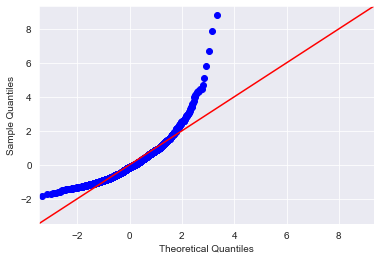

In [46]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

In [47]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

PatsyError: predict requires that you use a DataFrame when predicting from a model
that was created using the formula api.

The original error message returned by patsy is:
Error evaluating factor: NameError: name 'percent_Asian' is not defined
    MV_Mortality_Rate~percent_Asian+percent_Native_Hawaiian_or_Other_Pacific_Islander+percent_Not_Proficient_in_English
                      ^^^^^^^^^^^^^

### Interactions

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [82]:
features = ['percent_Physically_Inactive',
         'percent_Excessive_Drinking',
         'percent_Alcohol_Impaired',
         'percent_Uninsured_x',
         'Average_Daily_PM25',
         'percent_Drive_Alone',
         'percent_Long_Commute___Drives_Alone',
         'percent_Frequent_Physical_Distress',
         'percent_Frequent_Mental_Distress',
         'percent_Insufficient_Sleep',
         'Household_Income',
         'Population_y',
         'percent_under_18',
         'percent_65_and_over',
         'percent_African_American',
         'percent_American_Indian_or_Alaskan_Native',
         'percent_Asian',
         'percent_Native_Hawaiian_or_Other_Pacific_Islander',
         'percent_Hispanic',
         'percent_Non_Hispanic_White',
         'percent_Not_Proficient_in_English',
         'percent_Female',
         'percent_Rural'
        ]

### See how interactions improve your baseline

In [55]:
def build_interaction_rm(varname, description):
    regression_h = LinearRegression()
    regression_m = LinearRegression()
    regression_l = LinearRegression()
    regression_h.fit(high_rm[varname].values.reshape(-1, 1), high_rm['target'])
    regression_m.fit(med_rm[varname].values.reshape(-1, 1), med_rm['target'])
    regression_l.fit(low_rm[varname].values.reshape(-1, 1), low_rm['target'])

    # Make predictions using the testing set
    pred_high = regression_h.predict(high_rm[varname].values.reshape(-1, 1))
    pred_med = regression_m.predict(med_rm[varname].values.reshape(-1, 1))
    pred_low = regression_l.predict(low_rm[varname].values.reshape(-1, 1))

    # The coefficients
    print(regression_h.coef_)
    print(regression_m.coef_)
    print(regression_l.coef_)

    # Plot outputs
    plt.figure(figsize=(12,7))
    plt.scatter(high_rm[varname], high_rm['target'],  color='blue', alpha = 0.3, label = 'more rooms')
    plt.scatter(med_rm[varname], med_rm['target'],  color='red', alpha = 0.3, label = 'medium rooms')
    plt.scatter(low_rm[varname], low_rm['target'],  color='orange', alpha = 0.3, label = 'low amount of rooms')

    plt.plot(low_rm[varname], pred_low,  color='orange', linewidth=2)
    plt.plot(med_rm[varname], pred_med,  color='red', linewidth=2)
    plt.plot(high_rm[varname], pred_high,  color='blue', linewidth=2)
    plt.ylabel('house value')
    plt.xlabel(description)
    plt.legend()

Using a 10-fold cross-validation to build a model using all the above interactions

### Baseline 

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
#warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import scale

In [86]:
data = df[features]#.drop(column='MV_Mortality_Rate')

y = pd.DataFrame(df.MV_Mortality_Rate)#, columns=[target])
X = pd.DataFrame(data, columns = data.columns)

X_scaled = scale(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

all_data = pd.concat([y, X_scaled], axis=1)
regression = LinearRegression()

crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
baseline = np.mean(cross_val_score(regression, X_scaled, y, scoring='r2', cv=crossvalidation))
baseline

0.5395507266172348

### Interactions

In [87]:
from itertools import combinations
combinations = list(combinations(data.columns, 2))

interactions = []
data = X_scaled.copy()
for comb in combinations:
    data['interaction'] = data[comb[0]] * data[comb[1]]
    score = np.mean(cross_val_score(regression, data, y, scoring='r2', cv=crossvalidation))
    if score > baseline: interactions.append((comb[0], comb[1], round(score, 3)))
            
print('Top 7 interactions: %s' %sorted(interactions, key=lambda inter: inter[2], reverse=True)[:7])

Top 7 interactions: [('percent_Drive_Alone', 'percent_American_Indian_or_Alaskan_Native', 0.557), ('Average_Daily_PM25', 'percent_American_Indian_or_Alaskan_Native', 0.554), ('percent_Drive_Alone', 'percent_Non_Hispanic_White', 0.553), ('percent_Uninsured_x', 'percent_Drive_Alone', 0.552), ('Average_Daily_PM25', 'percent_Drive_Alone', 0.552), ('Average_Daily_PM25', 'percent_Frequent_Physical_Distress', 0.55), ('Average_Daily_PM25', 'percent_Frequent_Mental_Distress', 0.55)]


In [88]:
df_inter = X_scaled.copy()
ls_interactions = sorted(interactions, key=lambda inter: inter[2], reverse=True)[:7]
for inter in ls_interactions:
    df_inter[inter[0] + '_' + inter[1]] = X[inter[0]] * X[inter[1]]

### Polynomials

In [89]:
from sklearn.preprocessing import PolynomialFeatures
polynomials = []
for col in X.columns:
    for degree in [2, 3, 4]:
        data = X_scaled.copy()
        poly = PolynomialFeatures(degree, include_bias=False)
        X_transformed = poly.fit_transform(X[[col]])
        data = pd.concat([data.drop(col, axis=1),pd.DataFrame(X_transformed)], axis=1)
        score = np.mean(cross_val_score(regression, data, y, scoring='r2', cv=crossvalidation))
        if score > baseline: polynomials.append((col, degree, round(score, 3)))
print('Top 10 polynomials: %s' %sorted(polynomials, key=lambda poly: poly[2], reverse=True)[:10])

Top 10 polynomials: [('Average_Daily_PM25', 4, 0.546), ('percent_Drive_Alone', 2, 0.546), ('percent_Long_Commute___Drives_Alone', 4, 0.546), ('percent_Physically_Inactive', 2, 0.543), ('percent_Physically_Inactive', 3, 0.543), ('percent_Physically_Inactive', 4, 0.543), ('Average_Daily_PM25', 3, 0.543), ('percent_Insufficient_Sleep', 2, 0.543), ('percent_Insufficient_Sleep', 3, 0.543), ('percent_Insufficient_Sleep', 4, 0.543)]


In [90]:
polynom = pd.DataFrame(polynomials)
polynom.groupby([0], sort=False)[2].max()

0
percent_Physically_Inactive            0.543
percent_Excessive_Drinking             0.542
percent_Alcohol_Impaired               0.542
percent_Uninsured_x                    0.542
Average_Daily_PM25                     0.546
percent_Drive_Alone                    0.546
percent_Long_Commute___Drives_Alone    0.546
percent_Frequent_Mental_Distress       0.540
percent_Insufficient_Sleep             0.543
Household_Income                       0.540
percent_under_18                       0.540
percent_65_and_over                    0.540
percent_African_American               0.540
percent_Asian                          0.541
percent_Hispanic                       0.541
percent_Non_Hispanic_White             0.543
percent_Female                         0.540
Name: 2, dtype: float64

In [91]:
for col in ['percent_Alcohol_Impaired', 'percent_Excessive_Drinking']:
    poly = PolynomialFeatures(4, include_bias=False)
    X_transformed = poly.fit_transform(X[[col]])
    colnames= [col, col + '_' + '2',  col + '_' + '3', col + '_' + '4']
    df_inter = pd.concat([df_inter.drop(col, axis=1), pd.DataFrame(X_transformed, columns=colnames)], axis=1)